<a href="https://colab.research.google.com/github/NishkaArora/CS155/blob/main/HW2/arora_nishka_set2_prob2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def load_data(filename):
    """
    Function loads data stored in the file filename and returns it as a numpy ndarray.
    
    Inputs:
        filename: given as a string.
        
    Outputs:
        Data contained in the file, returned as a numpy ndarray
    """
    return np.loadtxt(filename, skiprows=1, delimiter=',')

In [ ]:
# Load data

winedata1 = load_data('https://raw.githubusercontent.com/charlesincharge/Caltech-CS155-2022/main/sets/set2/data/wine_training1.txt')
winedata2 = load_data('https://raw.githubusercontent.com/charlesincharge/Caltech-CS155-2022/main/sets/set2/data/wine_training2.txt')
winedataval = load_data('https://raw.githubusercontent.com/charlesincharge/Caltech-CS155-2022/main/sets/set2/data/wine_validation.txt')

# Prepare datasets:

X1 = winedata1[:, 1:]
Y1 = winedata1[:, 0]

X2 = winedata2[:, 1:]
Y2 = winedata2[:, 0]

Xval = winedataval[:, 1:]
Yval = winedataval[:, 0]

# Normalize data

X1_mean = np.mean(X1, axis=0)
X1_std = np.std(X1, axis=0)
X1 = (X1 - X1_mean) / X1_std

X2_mean = np.mean(X2, axis=0)
X2_std = np.std(X2, axis=0)
X2 = (X2 - X2_mean) / X2_std

Xval_mean = np.mean(Xval, axis=0)
Xval_std = np.std(Xval, axis=0)
Xval = (Xval - Xval_mean) / Xval_std

# Add space for the bias term

X1 = np.insert(X1, 0, 1, axis=1)
X2 = np.insert(X2, 0, 1, axis=1)
Xval = np.insert(Xval, 0, 1, axis=1)

In [ ]:
from sklearn.utils import shuffle
def loss(X, Y, w):
    '''
    Calculate the squared loss function.
    
    Inputs:
        X: A (N, D) shaped numpy array containing the data points.
        Y: A (N, ) shaped numpy array containing the (float) labels of the data points.
        w: A (D, ) shaped numpy array containing the weight vector.
    
    Outputs:
        The loss evaluated with respect to X, Y, and w.
    '''
    #==============================================
    # TODO: Implement the SGD loss function.
    #==============================================
    return -1 * np.average(np.log(1 / (1 + np.exp(- 1 * Y * np.dot(X, w)))))

def gradient(x, y, w, lm, N):
    '''
    Calculate the gradient of the loss function with respect to the weight vector w,
    evaluated at a single point (x, y) and weight vector w.
    
    Inputs:
        x: A (D, ) shaped numpy array containing a single data point.
        y: The float label for the data point.
        w: A (D, ) shaped numpy array containing the weight vector.
        
    Output:
        The gradient of the loss with respect to w. 
    '''

    #==============================================
    # TODO: Implement the gradient of the
    # loss function.
    #==============================================    
    return -1 * y * x / (1 + np.exp(y * np.dot(w, x))) + (2 * lm / N) * w

def SGD(X, Y, w_start, eta, N_epochs, lam):
    '''
    Perform SGD using dataset (X, Y), initial weight vector w_start,
    learning rate eta, and N_epochs epochs.
    
    Inputs:
        X: A (N, D) shaped numpy array containing the data points.
        Y: A (N, ) shaped numpy array containing the (float) labels of the data points.
        w_start:  A (D, ) shaped numpy array containing the weight vector initialization.
        eta: The step size.
        N_epochs: The number of epochs (iterations) to run SGD.
        
    Outputs:
        W: A (N_epochs, D) shaped array containing the weight vectors from all iterations.
        losses: A (N_epochs, ) shaped array containing the losses from all iterations.
    '''
    
    #==============================================
    # TODO: Implement the SGD algorithm.
    #==============================================
    W = []
    # W.append(w_start)
    losses = []
    # losses.append(loss(X, Y, w_start))
    w_curr = w_start
    for e in range(N_epochs):
      X, Y = shuffle(X, Y)
      for i in range(len(Y)):
        w_curr -= eta * gradient(X[i], Y[i], w_curr, lam, X.shape[0])
      W.append(w_curr)
      losses.append(loss(X, Y, w_curr))
    # return W, losses
    print('Done')
    return W[-1]

In [ ]:
# Run the code

D = X1.shape[1]
eta = 5e-4
epochs = 20000
lambdas = [1e-5 * 5 ** i for i in range(15)]

w1 = [SGD(X1, Y1, np.random.random(D)/100, eta, epochs, lam) for lam in lambdas]

In [ ]:
from numpy import linalg
w1_train_errors = [loss(X1, Y1, w) for w in w1]
w1_test_errors = [loss(Xval, Yval, w) for w in w1]
w1_norms = [linalg.norm(w) for w in w1]

In [ ]:
w2 = [SGD(X2, Y2, np.random.random(D), eta, epochs, lam) for lam in lambdas]

Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done


In [ ]:
w2_train_errors = [loss(X2, Y2, w) for w in w2]
w2_test_errors = [loss(Xval, Yval, w) for w in w2]
w2_norms = [linalg.norm(w) for w in w2]

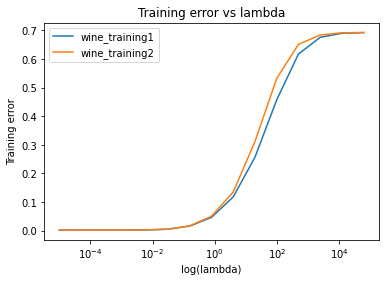

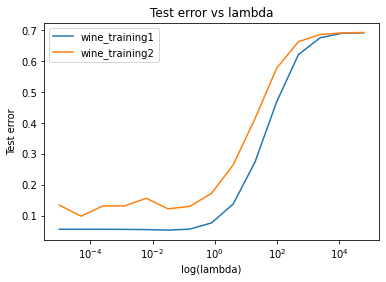

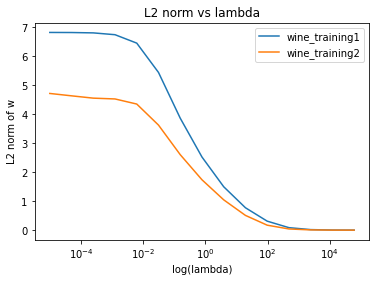

In [ ]:
# C i)
plt.figure()
plt.plot(lambdas, w1_train_errors)
plt.plot(lambdas, w2_train_errors)
plt.xscale('log')
plt.title('Training error vs lambda')
plt.xlabel('log(lambda)')
plt.ylabel('Training error')
plt.legend(['wine_training1', 'wine_training2'], loc = 'best')
plt.savefig('training error vs lambda')

# C ii)
plt.figure()
plt.plot(lambdas, w1_test_errors)
plt.plot(lambdas, w2_test_errors)
plt.xscale('log')
plt.title('Test error vs lambda')
plt.xlabel('log(lambda)')
plt.ylabel('Test error')
plt.legend(['wine_training1', 'wine_training2'], loc = 'best')
plt.savefig('test error vs lambda')

# C iii)
plt.figure()
plt.plot(lambdas, w1_norms)
plt.plot(lambdas, w2_norms)
plt.xscale('log')
plt.title('L2 norm vs lambda')
plt.xlabel('log(lambda)')
plt.ylabel('L2 norm of w')
plt.legend(['wine_training1', 'wine_training2'], loc = 'best')
plt.savefig('L2 Norm of w vs lambda')